In [ ]:
#pip install pingouin

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
import seaborn as sns
#import pingouin as pg
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score 
from sklearn import svm
from sklearn import metrics

%matplotlib inline

In [ ]:
data = pd.read_excel("ResultadosCompleto.xlsx")

In [ ]:
check_for_nan = data.isnull().values.any()
print (check_for_nan)

False


In [ ]:
data

,edad,genero,personalidad,estilo
0,25,Masculino,Confiable,5
1,28,Femenino,Animado,4
2,18,Femenino,Animado,6
3,45,Masculino,Extravertido,3
4,21,Masculino,Confiable,3
...,...,...,...,...
2205,26,Femenino,Animado,10
2206,29,Femenino,Animado,1
2207,22,Masculino,Extravertido,8
2208,22,Masculino,Responsable,4


In [ ]:
import numpy as np
bins = np.linspace(17,30,6)
labels = ['rang1', 'rang2', 'rang3','rang4','rang5']
data['edad'] = pd.cut(data['edad'], bins, labels=labels)

print(bins)
print(data)

[17.  19.6 22.2 24.8 27.4 30. ]
       edad     genero  personalidad  estilo
0     rang4  Masculino     Confiable       5
1     rang5   Femenino       Animado       4
2     rang1   Femenino       Animado       6
3       NaN  Masculino  Extravertido       3
4     rang2  Masculino     Confiable       3
...     ...        ...           ...     ...
2205  rang4   Femenino       Animado      10
2206  rang5   Femenino       Animado       1
2207  rang2  Masculino  Extravertido       8
2208  rang2  Masculino   Responsable       4
2209  rang1  Masculino     Confiable       7

[2210 rows x 4 columns]


In [ ]:
check_for_nan = data.isnull().values.any()
print (check_for_nan)
data.isnull().sum()

True


edad            254
genero            0
personalidad      0
estilo            0
dtype: int64

In [ ]:
data = data[~data['edad'].isnull()].copy()
data

,edad,genero,personalidad,estilo
0,rang4,Masculino,Confiable,5
1,rang5,Femenino,Animado,4
2,rang1,Femenino,Animado,6
4,rang2,Masculino,Confiable,3
5,rang2,Masculino,Animado,10
...,...,...,...,...
2205,rang4,Femenino,Animado,10
2206,rang5,Femenino,Animado,1
2207,rang2,Masculino,Extravertido,8
2208,rang2,Masculino,Responsable,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 2209
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   edad          1956 non-null   category
 1   genero        1956 non-null   object  
 2   personalidad  1956 non-null   object  
 3   estilo        1956 non-null   int64   
dtypes: category(1), int64(1), object(2)
memory usage: 63.2+ KB


AxesSubplot(0.125,0.125;0.775x0.755)


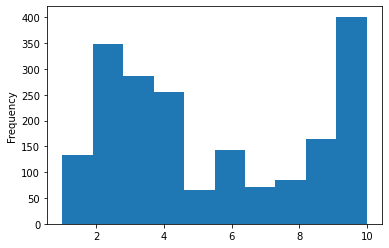

In [ ]:
histogram = data.estilo.plot.hist()
print(histogram)
plt.show()

In [ ]:
indexNames = data[ (data['estilo'] >= 3) & (data['estilo'] <= 9)].index
indexNames1 = data[ (data['estilo'] == 1)].index
data.drop(indexNames , inplace=True)
data.drop(indexNames1 , inplace=True)
print(data)

       edad     genero personalidad  estilo
5     rang2  Masculino      Animado      10
6     rang2  Masculino  Responsable      10
11    rang5   Femenino        Serio      10
12    rang3  Masculino        Serio      10
13    rang2   Femenino      Animado      10
...     ...        ...          ...     ...
2197  rang4   Femenino  Responsable       2
2200  rang5  Masculino    Confiable       2
2201  rang1   Femenino      Animado      10
2204  rang3  Masculino      Animado      10
2205  rang4   Femenino      Animado      10

[749 rows x 4 columns]


In [ ]:
one_hot_Personalidad = pd.get_dummies(data.personalidad )
one_hot_edad = pd.get_dummies(data.edad )
one_hot_gen = pd.get_dummies(data.genero )

In [ ]:
y = data[['estilo']]
y_norm = (y - y.min()) / ( y.max() - y.min())

In [ ]:
data = pd.concat([one_hot_edad, one_hot_gen, one_hot_Personalidad, y_norm ], axis=1)

In [ ]:
data

,rang1,rang2,rang3,rang4,rang5,Femenino,Masculino,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,0,1,0,0,0,0,1,1,0,0,0,0,1.0
6,0,1,0,0,0,0,1,0,0,0,1,0,1.0
11,0,0,0,0,1,1,0,0,0,0,0,1,1.0
12,0,0,1,0,0,0,1,0,0,0,0,1,1.0
13,0,1,0,0,0,1,0,1,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0,0,0,1,0,1,0,0,0,0,1,0,0.0
2200,0,0,0,0,1,0,1,0,1,0,0,0,0.0
2201,1,0,0,0,0,1,0,1,0,0,0,0,1.0
2204,0,0,1,0,0,0,1,1,0,0,0,0,1.0


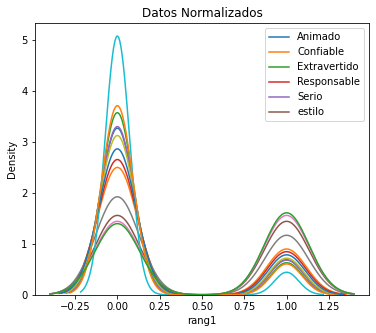

In [ ]:
fig,(ax1) = plt.subplots(ncols=1, figsize=(6,5))
ax1.set_title('Datos Normalizados')

sns.kdeplot(data['rang1'], ax=ax1)
sns.kdeplot(data['rang2'], ax=ax1)
sns.kdeplot(data['rang3'], ax=ax1)
sns.kdeplot(data['rang4'], ax=ax1)
sns.kdeplot(data['rang5'], ax=ax1)

sns.kdeplot(data['Femenino'], ax=ax1)
sns.kdeplot(data['Masculino'], ax=ax1)

sns.kdeplot(data['Animado'], ax=ax1)
sns.kdeplot(data['Confiable'], ax=ax1)
sns.kdeplot(data['Extravertido'], ax=ax1)
sns.kdeplot(data['Responsable'], ax=ax1)
sns.kdeplot(data['Serio'], ax=ax1)

sns.kdeplot(data['estilo'], ax=ax1)

plt.legend(labels=["Animado", "Confiable", "Extravertido", "Responsable", "Serio", "estilo"])

In [ ]:
data.to_excel("DatosLimpios_AllFeatures.xlsx")

In [ ]:
datos = pd.read_excel("DatosLimpios_AllFeatures.xlsx", names=['rang1', 'rang2', 'rang3', 'rang4','rang5', 'Femenino', 'Masculino', 'Animado', 'Confiable', 'Extravertido', 'Responsable', 'Serio','estilo'])
datos

,rang1,rang2,rang3,rang4,rang5,Femenino,Masculino,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,0,1,0,0,0,0,1,1,0,0,0,0,1
6,0,1,0,0,0,0,1,0,0,0,1,0,1
11,0,0,0,0,1,1,0,0,0,0,0,1,1
12,0,0,1,0,0,0,1,0,0,0,0,1,1
13,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0,0,0,1,0,1,0,0,0,0,1,0,0
2200,0,0,0,0,1,0,1,0,1,0,0,0,0
2201,1,0,0,0,0,1,0,1,0,0,0,0,1
2204,0,0,1,0,0,0,1,1,0,0,0,0,1


In [ ]:
datos = datos.values
X = datos[:, :-1]
y = datos[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [ ]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [ ]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.48      1.00      0.65       109

    accuracy                           0.48       225
   macro avg       0.24      0.50      0.33       225
weighted avg       0.23      0.48      0.32       225

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       106
           1       0.67      0.76      0.72       119

    accuracy                           0.68       225
   macro avg       0.68      0.67      0.67       225
weighted avg       0.68      0.68      0.68       225

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        97
           1       0.73      0.77      0.75       128

    accuracy                           0.71       225
   macro avg       0.70      0.70      0.70     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['poly','rbf','sigmoid', 'linear']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='linear')


In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 39  66]
 [  5 115]]
              precision    recall  f1-score   support

           0       0.89      0.37      0.52       105
           1       0.64      0.96      0.76       120

    accuracy                           0.68       225
   macro avg       0.76      0.66      0.64       225
weighted avg       0.75      0.68      0.65       225



In [ ]:
print("precisión entranamiento: {0: .2f}".format(
        grid.score(X_train, y_train)))

precisión entranamiento:  0.71


In [ ]:
print("precisión testeo: {0: .2f}".format(
        grid.score(X_test, y_test)))

precisión testeo:  0.68


In [ ]:
cls = svm.SVC()
cls.fit(X_train, y_train)
a = cross_val_score(cls, X_train, y_train, cv = 5, scoring="accuracy")
a.mean()

0.685128205128205

In [ ]:
a = cross_val_score(grid, X_train, y_train, cv = 5, scoring="accuracy")
print("Accuracy: {0: .2f}".format(a.mean()))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

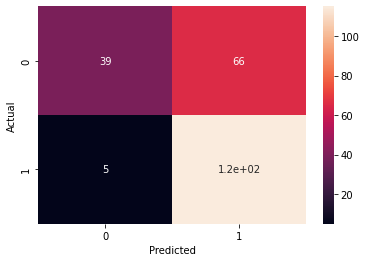

In [ ]:
confusion_matrix = pd.crosstab(y_test, grid_predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
### Evaluate the model

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, grid_predictions))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, grid_predictions))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, grid_predictions))

Accuracy: 0.6844444444444444
Precision: 0.6353591160220995
Recall: 0.9583333333333334


In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

							
X_new = pd.DataFrame({'rang1': [1], 'rang2': [0], 'rang3': [0], 'rang4': [0], 'rang5': [0], 'Femenino': [0], 'Masculino': [1], 'Animado': [0], 'Confiable': [0], 'Extravertido': [1], 'Responsable': [0], 'Serio': [0]})
print("El array 1 corresponde al estilo casual y el 0 corresponde al estilo modesto\n")
print("El estilo de vestir es:", grid.predict(X_new))

El array 1 corresponde al estilo casual y el 0 corresponde al estilo modesto

El estilo de vestir es: [1]
